# Machine Learning Assignment 1: Predicting beer types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors, linear_model
from sklearn.metrics import classification_report
from itertools import product
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

## Read data

In [2]:
col_names = ['calorific_value', 'nitrogen', 'turbidity', 'style', 'alcohol', 'sugars', 'bitterness', 'beer_id', 'colour', 'degree_of_fermentation']
train = pd.read_csv('/Users/ivabubalo/Documents/MSc in AI/ML/Beer project/Datastore/beer_training.txt', sep="\t", names=col_names, engine='python')

In [3]:
train.head(2)

,calorific_value,nitrogen,turbidity,style,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
0,45.305310,0.459548,1.917273,ale,4.227692,16.67,12.568947,167,11.04,62.178571
1,43.889381,0.548977,3.186364,ale,4.289231,16.73,14.974000,128,13.44,63.032857


In [4]:
train.shape

(124, 10)

In [5]:
train.dtypes

calorific_value           float64
nitrogen                  float64
turbidity                 float64
style                      object
alcohol                   float64
sugars                    float64
bitterness                float64
beer_id                     int64
colour                    float64
degree_of_fermentation    float64
dtype: object

In [6]:
col_names = ['calorific_value', 'nitrogen', 'turbidity', 'style', 'alcohol', 'sugars', 'bitterness', 'beer_id', 'colour', 'degree_of_fermentation']
test = pd.read_csv('/Users/ivabubalo/Documents/MSc in AI/ML/Beer project/Datastore/beer_test.txt', sep="\t", names=col_names, engine='python')

In [7]:
test.head(2)

,calorific_value,nitrogen,turbidity,style,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
0,41.721239,0.503276,2.628182,ale,4.015385,16.73,10.452789,93,13.44,55.337143
1,42.429204,0.525512,1.776364,ale,4.092308,16.72,10.999526,103,12.24,58.380000


In [8]:
test.shape

(30, 10)

In [9]:
test.dtypes

calorific_value           float64
nitrogen                  float64
turbidity                 float64
style                      object
alcohol                   float64
sugars                    float64
bitterness                float64
beer_id                     int64
colour                    float64
degree_of_fermentation    float64
dtype: object

## Data preprocessing

In [10]:
#check for missing values
train.isna().sum()

calorific_value           0
nitrogen                  0
turbidity                 0
style                     0
alcohol                   0
sugars                    0
bitterness                0
beer_id                   0
colour                    0
degree_of_fermentation    0
dtype: int64

In [11]:
test.isna().sum()

calorific_value           0
nitrogen                  0
turbidity                 0
style                     0
alcohol                   0
sugars                    0
bitterness                0
beer_id                   0
colour                    0
degree_of_fermentation    0
dtype: int64

Any algorithm, such as k-NN, which cares about the distance between data points, may thus focus squarely and unfairly on variables with a larger range.  https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn

### Exploratory

array([[<AxesSubplot:title={'center':'calorific_value'}>,
        <AxesSubplot:title={'center':'nitrogen'}>,
        <AxesSubplot:title={'center':'turbidity'}>],
       [<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'sugars'}>,
        <AxesSubplot:title={'center':'bitterness'}>],
       [<AxesSubplot:title={'center':'beer_id'}>,
        <AxesSubplot:title={'center':'colour'}>,
        <AxesSubplot:title={'center':'degree_of_fermentation'}>]],
      dtype=object)

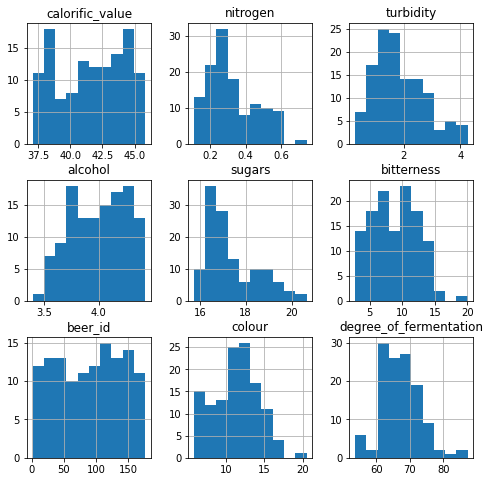

In [12]:
pd.DataFrame.hist(train, figsize = [8,8])

In [13]:
train.describe()

,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,41.638096,0.322277,1.858922,3.998486,17.365645,8.935387,90.032258,11.321226,67.143733
std,2.623812,0.135035,0.891977,0.250500,1.113639,3.419934,50.833370,2.842828,5.862946
min,37.075221,0.107013,0.290909,3.393846,15.740000,2.730211,1.000000,5.760000,53.668571
25%,38.966814,0.215891,1.192727,3.801538,16.560000,6.140829,44.500000,9.000000,63.336071
50%,41.809735,0.290150,1.720000,4.015385,16.900000,9.436842,94.500000,11.520000,66.663571
75%,44.022124,0.405223,2.373409,4.219231,18.150000,11.476408,133.500000,13.230000,70.733929
max,45.836283,0.742774,4.255455,4.427692,20.650000,20.063789,177.000000,20.520000,87.238571


In [14]:
test.describe()

,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,41.722714,0.315067,1.993182,4.037641,17.213000,8.463911,91.733333,11.408000,61.087095
std,2.616999,0.106278,1.063155,0.246711,1.140551,3.035596,51.831247,2.599807,11.134063
min,37.296460,0.156837,0.689091,3.526154,15.900000,2.924895,4.000000,6.840000,37.034286
25%,39.973451,0.237648,1.345227,3.879231,16.647500,6.341276,54.500000,9.390000,53.237143
50%,41.522124,0.271882,1.771818,4.033846,16.730000,7.855421,87.000000,11.760000,59.157143
75%,43.977876,0.395544,2.252500,4.173846,17.752500,10.727566,131.750000,13.350000,73.330000
max,45.880531,0.525512,5.217273,4.563077,20.510000,13.456368,178.000000,15.360000,79.134286


### Label encoding

In [15]:
train["style"].unique()

array(['ale', 'lager', 'stout'], dtype=object)

In [16]:
#convert the labels to numerical values
train["style"] = train["style"].astype('category')
train["style"] = train["style"].cat.codes
train["style"].unique()

array([0, 1, 2], dtype=int8)

In [17]:
test["style"] = test["style"].astype('category')
test["style"] = test["style"].cat.codes
test["style"].unique()

array([0, 1, 2], dtype=int8)

### Split target variable

In [18]:
X_train = train.drop('style' , 1).values # drop target variable
y_train = train['style'].values # store target variable into y_train 

In [19]:
y_train.astype

<function ndarray.astype>

In [20]:
X_test = test.drop('style' , 1).values # drop target variable
y_test = test['style'].values # store target variable into y_train 

## Model 1 build

#### kNN k = 3

In [21]:
#non-normalized data
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.466667


#### Evaluation Model 1.1

In [22]:
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.50      0.80      0.62        10
           2       0.67      0.20      0.31        10

    accuracy                           0.47        30
   macro avg       0.51      0.47      0.43        30
weighted avg       0.51      0.47      0.43        30



Models perform worse on non-normalized data, i.e. variables which have different scales. <br>In the next step I will use scale( ) from sklearn.preprocessing to normalize training and testing data. 

In [23]:
#normalize data
from sklearn.preprocessing import scale
Xs_train = scale(X_train)
Xs_test = scale(X_test)

knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.933333
k-NN score for training set: 0.975806
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.90      0.90      0.90        10
           2       1.00      0.90      0.95        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



#### kNN k = 5

In [24]:
#non-normalized data
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_3 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_3.score(X_test, y_test))

k-NN accuracy for test set: 0.400000


#### Evaluation Model 1.2

In [25]:
y_true, y_pred = y_test, knn_model_3.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.40      0.36        10
           1       0.44      0.70      0.54        10
           2       0.50      0.10      0.17        10

    accuracy                           0.40        30
   macro avg       0.42      0.40      0.36        30
weighted avg       0.42      0.40      0.36        30



In [26]:
#normalized data
Xs_train = scale(X_train)
Xs_test = scale(X_test)

knn_model_4 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_4.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_4.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_4.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.966667
k-NN score for training set: 0.967742
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Finding the optimal value of _k_

In [27]:
from sklearn.model_selection import cross_val_score
# use the same model as before
knn = neighbors.KNeighborsClassifier(n_neighbors = 29)

scores = cross_val_score(knn, Xs_train, y_train, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# average about the five scores to get a single accuracy score
print(scores.mean())


[0.96  0.96  1.    1.    0.875]
0.959


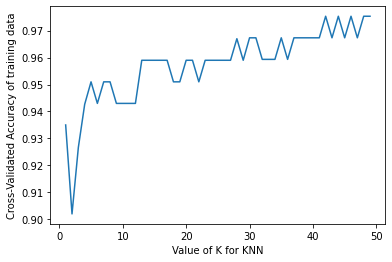

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 50)
k_scores = []
# use iteration to caclulate different k in models, 
# then return the average accuracy based on the cross validation
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xs_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot the results
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy of training data')
plt.show()

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

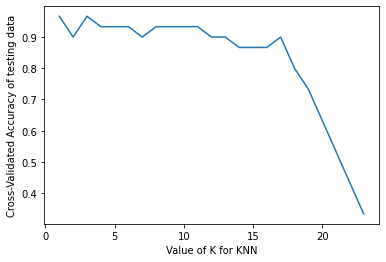

In [30]:
# choose k between 1 to 31
k_range = range(1, 24)
k_scores = []
# use iteration to caclulate different k in models, 
# then return the average accuracy based on the cross validation
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xs_test, y_test, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot the results
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy of testing data')
plt.subplot(k_range, k_scores)
plt.show()

### Model 2 build

SVM with linear kernel

In [31]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train) #non-normalized data

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluation Model 2

In [32]:
# Model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10
           2       1.00      1.00      1.00        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



SVM with rbf kernel

In [33]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Non-Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train) #non-normalilzed data

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [34]:
# Model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.29      0.50      0.37        10
           2       0.00      0.00      0.00        10

    accuracy                           0.27        30
   macro avg       0.22      0.27      0.23        30
weighted avg       0.22      0.27      0.23        30



In [35]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Non-Linear Kernel

#Train the model using the training sets
clf.fit(Xs_train, y_train) #normalilzed data

#Predict the response for test dataset
y_pred = clf.predict(Xs_test)

In [36]:
# Model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



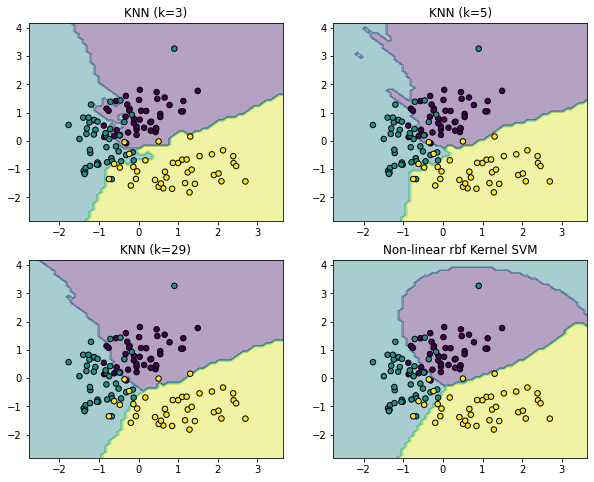

In [37]:
X = Xs_train[:, [2, 5]] #normalized training data
y = y_train

# Training classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = KNeighborsClassifier(n_neighbors=29)
clf4 = SVC(gamma=.1, kernel='rbf', probability=True)


clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, figsize=(10, 8), squeeze=False)
#f.delaxes(axarr[-1,-2])
#f.delaxes(axarr[-1,-1])

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN (k=3)','KNN (k=5)','KNN (k=29)',
                         'Non-linear rbf Kernel SVM']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=30, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)


plt.show()

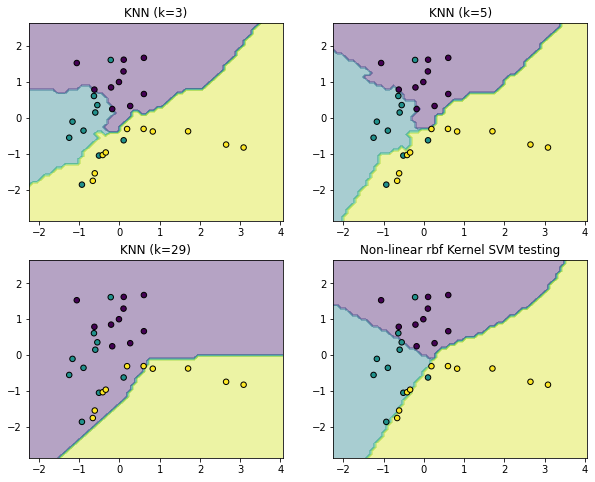

In [38]:
X = Xs_test[:, [2, 5]] #normalized testing data
y = y_test

# Training classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = KNeighborsClassifier(n_neighbors=29)
clf4 = SVC(gamma=.1, kernel='rbf', probability=True)


clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, figsize=(10, 8), squeeze=False)
#f.delaxes(axarr[-1,-2])
#f.delaxes(axarr[-1,-1])

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN (k=3)','KNN (k=5)','KNN (k=29)',
                         'Non-linear rbf Kernel SVM testing']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=30, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)


plt.show()

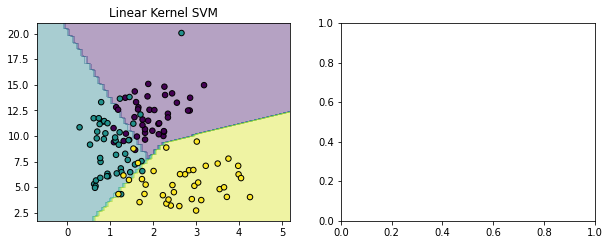

In [39]:
X = X_train[:, [2, 5]] #non-normalized training data
y = y_train

# Training classifiers
clf4 = SVC(gamma=.1, kernel='linear', probability=True)
clf4.fit(X, y)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, figsize=(10, 8), squeeze=False)
f.delaxes(axarr[-1,-1])
f.delaxes(axarr[-1,-2])

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf4],
                        ['Linear Kernel SVM']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=30, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)


plt.show()

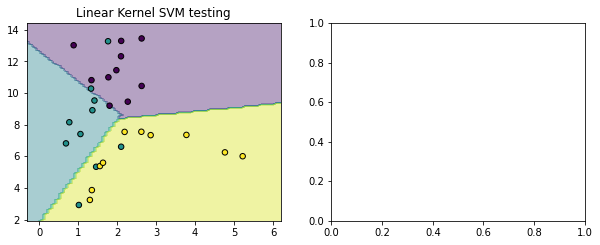

In [40]:
X = X_test[:, [2, 5]] #non-normalized testing data
y = y_test

# Training classifiers
clf4 = SVC(gamma=.1, kernel='linear', probability=True)
clf4.fit(X, y)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, figsize=(10, 8), squeeze=False)
f.delaxes(axarr[-1,-1])
f.delaxes(axarr[-1,-2])

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf4],
                        ['Linear Kernel SVM testing']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=30, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)


plt.show()

## References


https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn

https://pbpython.com/categorical-encoding.html

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python


